Using TensorFlow backend.


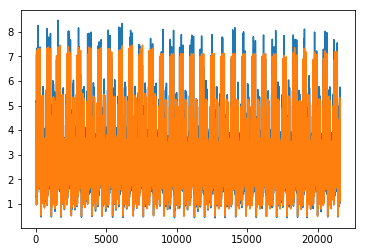

10565 21600


In [1]:
# External libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from keras.layers import LSTM, Bidirectional,Dense
from keras.models import Sequential
from scipy.signal import savgol_filter
from keras.models import load_model
dataset = scipy.io.loadmat('OptimalBiddingTrain.mat')
n1 = 1
n2 = 900
n_days = n2-n1+1
n_blocks = 24*n_days
price_pred = dataset['Price_Train_pred']
flat_dp = (price_pred.flatten())[(n1-1)*24:(n1-1)*24+n_blocks]
price_real = dataset['Price_Train']
flat_dr = (price_real.flatten())[(n1-1)*24:(n1-1)*24+n_blocks]
plt.plot(range(n_blocks),flat_dp)
plt.plot(range(n_blocks),flat_dr)
plt.show()
count = 0
for i in range(len(price_pred)):
    for j in range(len(price_pred[i])):
        if price_pred[i,j] < price_real[i,j]:
            count+=1
print(count,n_blocks)

In [2]:
import tensorflow as tf
def getLossFunction(a):
    def lossFunction(y_true,y_pred):
        return tf.pow(y_pred - y_true,2)*tf.pow(tf.sign(y_pred-y_true)+a,2)
    return lossFunction
temp = price_pred.flatten()
model = Sequential()
model.add(Bidirectional(LSTM(24,activation='relu',return_sequences=True), input_shape=(24,1)))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='relu'))
price_X = np.reshape(price_pred.flatten(),(-1,24,1))
price_Y = np.reshape(price_real.flatten(),(-1,24,1))
model.compile(loss=getLossFunction(-0.1),optimizer='adam')
model.fit(price_X,price_Y,batch_size = 2,epochs = 100)
model.save('price_opt_bilstm_model1.h5')
#model = load_model('price_opt_bilstm_model.h5',custom_objects={'lossFunction':getLossFunction(-0.08)})
# y_pred = np.reshape(model.predict(np.reshape(temp,(900,24,1))),(900,24,))
# for i in range(900):
#     val_range = max(y_pred[i])-min(y_pred[i])
#     y_pred[i] = (1.7*(1-(y_pred[i]/max(y_pred[i])))+2.2*(abs(y_pred[i]-val_range/2)/val_range))/2 + np.reshape(savgol_filter(x = y_pred[i].flatten(),window_length=3,polyorder=2),(1,24,))

Epoch 1/100
900/900 [==============================] - 15s - loss: 0.4524    
Epoch 2/100
900/900 [==============================] - 11s - loss: 0.0575    
Epoch 3/100
900/900 [==============================] - 11s - loss: 0.0524    
Epoch 4/100
900/900 [==============================] - 11s - loss: 0.0504    
Epoch 5/100
900/900 [==============================] - 12s - loss: 0.0511    
Epoch 6/100
900/900 [==============================] - 11s - loss: 0.0502    
Epoch 7/100
900/900 [==============================] - 11s - loss: 0.0483    
Epoch 8/100
900/900 [==============================] - 12s - loss: 0.0491    
Epoch 9/100
900/900 [==============================] - 12s - loss: 0.0479    
Epoch 10/100
900/900 [==============================] - 11s - loss: 0.0483    
Epoch 11/100
900/900 [==============================] - 11s - loss: 0.0474    
Epoch 12/100
900/900 [==============================] - 11s - loss: 0.0479    
Epoch 13/100
900/900 [==============================] - 12s -

In [3]:
# plt.plot(range(n_blocks),y_pred[n1-1:n2].flatten())
# plt.plot(range(n_blocks),flat_dr)
# plt.show()
# print(np.size(np.where(y_pred[n1-1:n2].flatten()<flat_dr)))
# print(np.where(y_pred[n1-1:n2].flatten()<flat_dr))